# EDA 

- VERİ BİLİMİNE GİRİŞ
- KAGGLE DAN DATASET BULUNDU VE ADIM ADIM İNCELEMEYE ALINDI
- DATA YI OKUMAK İÇİN KULLANICAĞIMIZ EN TEMEL KÜTÜPHANELERDEN  PANDAS NUMPY VE MATPLOTLİB OLUCAK

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # grafik kütüphanesi

In [29]:
# ilk 5 satırı ekrana getir ve incele
df = pd.read_csv(r"C:\Users\HP\OneDrive - ISTANBUL SAGLIK VE TEKNOLOJI UNIVERSITESI\Masaüstü\staj proje\palmerpenguins_extended.csv")

In [30]:
# veri yapısıyla ilgili bilgiler
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [34]:
#veri yapılarıyla ilgili bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB


In [35]:
#sayısal sütunların istatistikleri - uç değer var mı standar sapma ne kadar gibisinde önemli
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496,2023.348397
std,13.175171,2.774428,28.944765,1311.091310,1.313797
min,13.600000,9.100000,140.000000,2477.000000,2021.000000
25%,28.900000,16.600000,185.000000,3843.500000,2022.000000
50%,34.500000,18.400000,203.000000,4633.500000,2024.000000
75%,46.600000,20.300000,226.000000,5622.000000,2024.000000
max,88.200000,27.900000,308.000000,10549.000000,2025.000000


In [36]:
#eksik değer analizi yap
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

In [37]:
# eksik değer analizi yap
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64


In [38]:

# kategorik değişkenlerin tanımı -> değişkenler arasındaki dengesizlikleri göreceğiz (imbalanced data )
print(df['species'].value_counts())

print(df['island'].value_counts())

print(df['sex'].value_counts())

print(df['diet'].value_counts())

print(df['life_stage'].value_counts())

print(df['health_metrics'].value_counts())

species
Adelie       1560
Gentoo       1247
Chinstrap     623
Name: count, dtype: int64
island
Biscoe       1785
Dream        1133
Torgensen     512
Name: count, dtype: int64
sex
female    1726
male      1704
Name: count, dtype: int64
diet
krill       1419
fish         958
parental     860
squid        193
Name: count, dtype: int64
life_stage
juvenile    1541
adult       1029
chick        860
Name: count, dtype: int64
health_metrics
healthy        1550
overweight     1167
underweight     713
Name: count, dtype: int64


In [ ]:
# kategorik verilerin grafiksel görünümü matlib kütüphanesi kullandım

df['species'].value_counts().plot(kind='bar')
plt.title('species')
plt.show()
df['island'].value_counts().plot(kind='bar')
plt.title('island')
plt.show()
df['sex'].value_counts().plot(kind='bar')
plt.title('sex')
plt.show()
df['diet'].value_counts().plot(kind='bar')
plt.title('diet')
plt.show()
df['life_stage'].value_counts().plot(kind='bar')
plt.title('life_stage')
plt.show()
df['health_metrics'].value_counts().plot(kind='bar')
plt.title('health_metrics')
plt.show()

- Sayısal değerlerin görselleştirilmesi

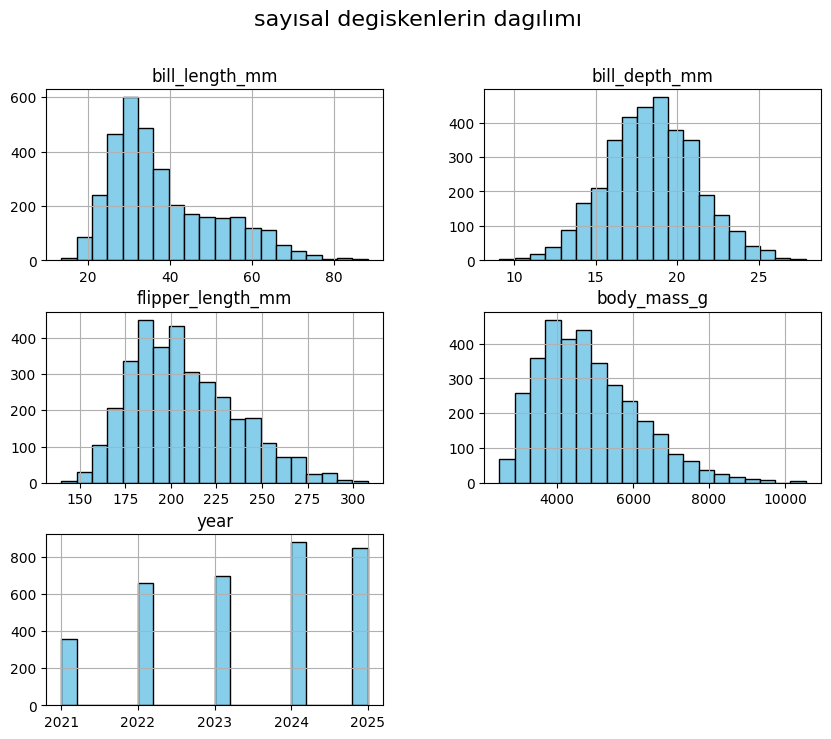

In [40]:
# --HİSTOGRAM (DAĞILIM GRAFİĞİ)
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("sayısal degiskenlerin dagılımı ", fontsize=16)
plt.show()

- uc değer outlier analizi için önemli 
- ÖNCE UÇ DEĞER VAR MI YOK MU TESPİT ETTİK

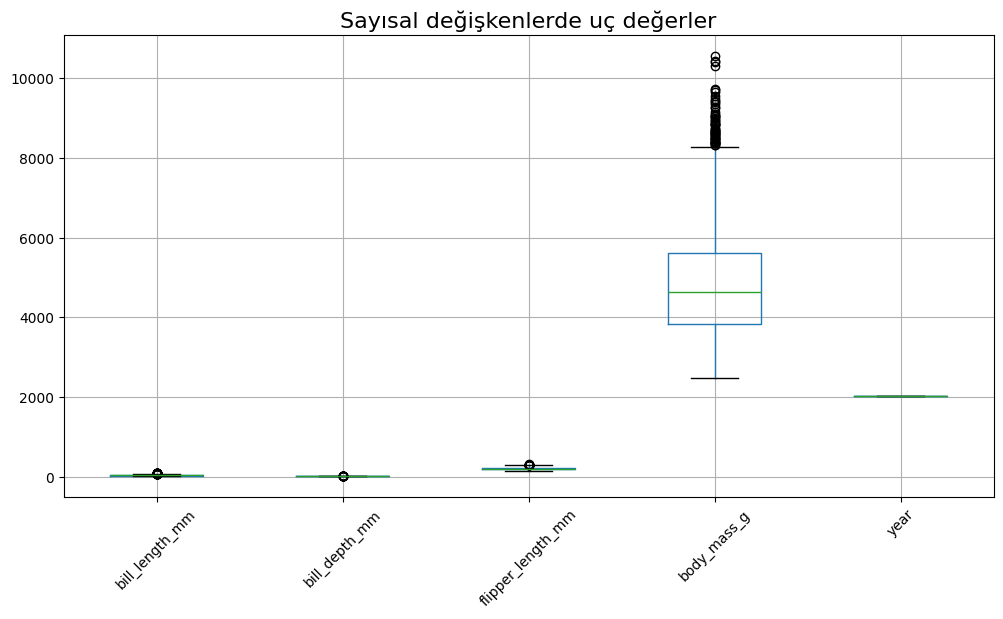

In [41]:
# boxplot
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

plt.figure(figsize=(12, 6))
df.boxplot(column=numeric_cols)
plt.title("Sayısal değişkenlerde uç değerler", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [42]:
# IQR yöntemi ile uç değer tespiti
# burda uç değerlerin nerelerde oldugunu satır ve sütunları tespit etmeye çalışıcaz

# Sayısal sütunları seç
numeric_cols = ['bill_length_mm', 'bill_depth_mm',
                'flipper_length_mm', 'body_mass_g']

# --------- 1) IQR Yöntemi ----------
# IQR yöntemiyle %25 ve %75 sınırlarını baz alarak bu sınır dışında kalan değerleri uç değer (outlier) olarak adlandırıyoruz

iqr_outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

# # IQR sınırları
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    iqr_outliers[col] = len(outliers)

print(" IQR ile bulunan uç değer sayıları:")
print(iqr_outliers)


# --------- 2) Z-Score Yöntemi ----------
# standart sapma baz alınarak outlier(uç değer) tespit edilir
zscore_outliers = {}
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()

    z_scores = (df[col] - mean) / std
    outliers = df[np.abs(z_scores) > 3]  # |z| > 3 olanlar
    zscore_outliers[col] = len(outliers)

print("\n Z-Score ile bulunan uç değer sayıları:")
print(zscore_outliers)

 IQR ile bulunan uç değer sayıları:
{'bill_length_mm': 42, 'bill_depth_mm': 26, 'flipper_length_mm': 22, 'body_mass_g': 56}

 Z-Score ile bulunan uç değer sayıları:
{'bill_length_mm': 19, 'bill_depth_mm': 10, 'flipper_length_mm': 12, 'body_mass_g': 28}


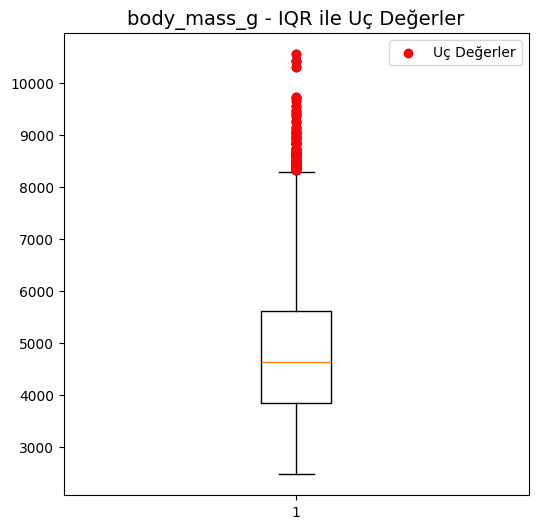

In [43]:
# IQR İLE BULUNAN UÇ DEĞERLERİN GRAFİK ÜZERİNDEN GÖSTERİMİ

col = 'body_mass_g'  # vücut kütlesinde uç değerlerin grafik üstünden gösterimi
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# # IQR sınırları
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Uç değerlerin indexlerini al
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

plt.figure(figsize=(6, 6))

# Boxplot
plt.boxplot(df[col], vert=True)
plt.title(f"{col} - IQR ile Uç Değerler", fontsize=14)

# Uç değerleri kırmızı noktalarla işaretle
plt.scatter([1]*len(outliers), outliers, color='red',
            zorder=2, label='Uç Değerler')

plt.legend()
plt.show()